# Assignment: Geom1A
For this problem set, we'll be using a Jupyter notebook. 

**Few Important Things:**
 - Save this file as geo1_emailuser_attempt#_assignment (e.g. geo1_mmann1123_attempt1_geom1A.ipynb)
 - Before submitting make sure to go to Cell > Run All and confirm there are no errors thrown.
 - If you can't figure something out, that is ok, do your best and share it


---
## Problem 1: Creating basic geometries 

### Part A: Points (2 Points)
Create a function called `createPointGeom()` that has two parameters (x_coord, y_coord). Note that these functions assume (x=lon,y=lat) not (lat, lon). Function should create a shapely Point geometry object and return that. 
We will check the usage of the function by creating Point objects with the function.


In [142]:
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString

def createPointGeom(x_coord, y_coord):
    """ Returns a shapely Point object
    """
    # YOUR CODE HERE
    return Point(x_coord, y_coord)




Your function should return a shapely point object. Check that is does:

*Do not change cell below*

In [143]:
"""Run the following: you should get no errors"""
try:
    assert createPointGeom(1,2) is not None
except AssertionError:
    raise AssertionError("createPointGeom is not returning an object")
try:
    assert isinstance(createPointGeom(1,2), Point) 
except AssertionError:
    raise AssertionError("Your object does not return a shapely.geometry.Point object")

try:
    assert createPointGeom(1,2).coords[0] ==(1.0, 2.0)
except AssertionError:
    raise AssertionError("The point object does not have the coordinates that were passed as an argument to createPointGeom")

In [144]:
"""Additional hidden tests"""

'Additional hidden tests'

In [145]:
"""Additional hidden tests"""

'Additional hidden tests'

### Part B (3 points)

#### Step 1
Create a function called `createLineGeom()` that takes a list of Shapely Point objects as a parameter and returns a 
LineString object of those input points. 
We will check the usage of the function by creating LineString objects with the function.


In [146]:
def createLineGeom(list_of_points):
    """ Returns a line object
    """
    # YOUR CODE HERE
    return LineString(list_of_points)


In [147]:
"""Run the following: you should get no errors"""
try:
    assert isinstance(createLineGeom([Point(2.2, 4.2),Point(7.2, -25.1),Point(9.26, -2.456)]), LineString) 
except AssertionError:
    raise AssertionError("createLineGeom does not return a LineString object")


In [148]:
"""Additional hidden tests"""

'Additional hidden tests'

In [149]:
"""Additional hidden tests"""

'Additional hidden tests'

-------------
### List comprehensions tutorial
*Ideally* the function should first check that the input list really contains Shapely Point(s). We can do this by using our `check4point` described in the lesson along with [list comprehension (tutorial)](https://www.datacamp.com/community/tutorials/python-list-comprehension).


In the following example I will show you how list comprehension works and help you write a function to use it in this case.

**Example** Basic for loop gathering result in a list:
``` python
out_list = []
for i in [1,2,3,4]:
    out_list.append(i**2)
```

**Example** List comprehension for loop gathering result in a list:
``` python
[i**2 for i in [1,2,3,4]]
```
Therefore we can create a for loop to go through all the list elements and check the data type for Points. 

Then we can use `all` to check if all the values of TF_point are == True. 

In [150]:
points_list = [Point(1,2),(1,2), Point(4,3)]
TF_point = []

# iterate through elements and keep track of wether they are points
for element in points_list:
    if isinstance(element, Point):
        TF_point.append(True)
    else:
        TF_point.append(False)
        
print('TF_point:', TF_point)
print('Are all elements of TF_point == True?', all(TF_point))

TF_point: [True, False, True]
Are all elements of TF_point == True? False


In this case `all(TF_point)` returns `False` because the `points_list` contains one non `Point` object. 

The same can be done more susinctly using list comprehension. See this [list comprehension tutorial](https://www.datacamp.com/tutorial/python-list-comprehension) if this is still confusing. 

Basically list comprehension allows us to compress the for loop into one line:

In [151]:
# Check each element and gather response in a list
list_compreh = [isinstance(element, Point) for element in points_list]
print('List Comprehension:', list_compreh)
 
# check if all elements of list are True
print('Are all elements of TF_point == True?',all([isinstance(element, Point) for element in points_list]) )


List Comprehension: [True, False, True]
Are all elements of TF_point == True? False


---------
#### Step 2

In the following problem use the list comprehension trick shown above to be sure all arguments (values passed to a function)  are of type `Point`, 

`if` true return the line object to the user e.g. `return a_line_object`, 

`else` use `raise(TypeError('You need to input a list of shapely Points.'))` to throw an error. 




For instance:

``` 
    if all( some list comprehension that returns True or False for each element based on whether it is a point or not):
        object = something 
        return object
    else:
        raise(TypeError('This is your error message'))
```
**Note: you don't need to raise the error inside of the list comprehension. You can create an if statement like we did in check4point**


In [152]:
def createLineGeom(list_of_points):
    """ Returns a line object after checking that all arguments are Points
    """
    list_compreh = [isinstance(element, Point) for element in list_of_points]
    print('List Comprehension:', list_compreh)

    if all([isinstance(element, Point) for element in list_of_points]) == True:
        return LineString(list_of_points)
    else:
        raise (TypeError('You need to input a list of shapely points'))


In [153]:
"""Run the following: you should get no errors"""
try:
    assert isinstance(createLineGeom([Point(2.2, 4.2),Point(7.2, -25.1),Point(9.26, -2.456)]), LineString) 
except AssertionError:
    raise AssertionError("createLineGeom does not return a LineString object")

try:
   createLineGeom(Point(2.2, 4.2),Point(7.2, -25.1),Point(9.26, -2.456))

# if an NameError is thrown, that means their function calls mse
except TypeError:
    pass

# if no error is thrown, that means their function does not call mse
else:
    raise AssertionError("your function accepts points outside of a list")

#### Check if accepts tuples
try:
   createLineGeom([(2.2, 4.2),(7.2, -25.1),(9.26, -2.456)])

# it should throw an error with the following text  
except TypeError as e:
        if str(e) == 'You need to input a list of shapely Points.':
            print(f'Your function correctly threw an error if the inputs were not points')
            pass
        else:
            print('Your error threw the wrong message, please follow instructions exactly')
else:
    raise TypeError("your function accepts a list of tuples but should not, instead you should raise an error with raise(TypeError('You need to input a list of shapely Points.'))")


List Comprehension: [True, True, True]
List Comprehension: [False, False, False]
Your error threw the wrong message, please follow instructions exactly


In [154]:
"""Additional hidden tests"""


'Additional hidden tests'

In [155]:
"""Additional hidden tests"""


'Additional hidden tests'

In [156]:
"""Additional hidden tests"""


'Additional hidden tests'

## Part C (2 points)

Create a function called `createPolyGeom()` that takes a list of coordinate tuples **OR** a list of Shapely Point objects and creates/returns 
a Polygon object of the input data. Both ways of passing the data to the function should be working. 
Demonstrate the usage of the function by passing data first with coordinate-tuples and then with Point -objects.

list of coodinate-tuples: `[(2.2, 4.2),(7.2, -25.1),(9.26, -2.456)]`
list of coodinate-tuples: `[Point(2.2, 4.2),Point(7.2, -25.1),Point(9.26, -2.456)]`


In [157]:
def createPolyGeom(list_of_points):
    """ Returns a polygon object
    """
    # YOUR CODE HERE
    point1 = Point(2,2, 4.2)
    point2 = Point(7.2, -25.1)
    point3 = Point(9.26, -2.456)

    poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
    poly2 = Polygon([(p.x, p.y) for p in [point1, point2, point3]])

In [158]:
"""Additional hidden tests"""


'Additional hidden tests'

In [159]:
"""Additional hidden tests"""


'Additional hidden tests'

## Problem 2: Attributes of geometries
### Part A (2 Points)
Create a function called `getCentroid()` that takes any kind of Shapely's geometric object as input and returns a centroid of that geometry. Demonstrate the usage of the function. Remember you can always go to [shapely docs](https://shapely.readthedocs.io/) or since it uses shapely the [geopandas docs pages](https://geopandas.org/en/stable/).


In [160]:
def getCentroid(obj):
    """ Returns a point object representing the centriod of an object
    """
    # YOUR CODE HERE
    return obj.centroid

In [161]:
"""Run the following: you should get no errors"""
try:
    assert isinstance(getCentroid(Point(0,0)), Point) 
except AssertionError:
    raise AssertionError("the returned centroid should be of type Point")
try:
    assert list(getCentroid(Point(0,0)).coords) == [(0.0, 0.0)]
except AssertionError:
    raise AssertionError("The centroid of (0,0) shoudl be (0.0, 0.0)")
try:
    assert isinstance(getCentroid(LineString([(0,0),(1,1),(2,2)])), Point) 
except AssertionError:
    raise AssertionError("Centroid of a line should still be a point")
try:
    assert isinstance(getCentroid(Polygon([(0,0),(1,1),(2,2)])), Point) 
except AssertionError:
    raise AssertionError("Centroid of a Polgon should still be a point")
try:
    assert list(Polygon([(0,0), (0,4), (4,4), (4,0)]).centroid.coords) == [(2.0, 2.0)]
except AssertionError:
    raise AssertionError("Seems to have returned the wrong coordinates for a polygon")

In [162]:
"""Additional hidden tests"""


'Additional hidden tests'

In [163]:
"""Additional hidden tests"""


'Additional hidden tests'

### Part B (2 points)
Create a function called `getArea()` that takes a Shapely's Polygon -object as input and returns the area of that geometry. Remember you can always go to [shapely docs](https://shapely.readthedocs.io/) or since it uses shapely the [geopandas docs pages](https://geopandas.org/en/stable/).


In [164]:
def getArea(obj):
    """ Returns floating point number representing the area of an object
    """
    # YOUR CODE HERE
    return obj.area

In [165]:
"""Additional hidden tests"""


'Additional hidden tests'

In [166]:
"""Additional hidden tests"""


'Additional hidden tests'

## Problem 3: Reading coordinates from a file and creating a geometries 

One of the "classical" problems in GIS is the situation where you have a set of coordinates in a file and you need to get them into a map (or into a GIS-software). Python is a really handy
tool to solve this problem as with Python it is basically possible to read data from any kind of input datafile (such as csv-, txt-, excel-, or gpx-files (gps data) or from different databases). 
So far, I haven't faced any kind of data or file that would be impossible to read with Python. 

Thus, let's see how we can read data from a file and create Point objects from them that can be saved e.g. as a new Shapefile (we will learn this next week). 
Our dataset **[New York Tax](geo1_data/ny_taxi_data.csv)** is one of the classic spatial kaggle [competitions](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction). 


Data Description
--------------------------

**key** 

Unique string identifying each row comprised of pickup_datetime plus a unique integer, but this doesn't matter, it should just be used as a unique ID field. 

**Features**

|Column Name|Description|
|---|---|
|   pickup_datetime | timestamp value indicating when the taxi ride started.|
|   pickup_longitude | float for longitude coordinate of where the taxi ride started. |
|   pickup_latitude | float for latitude coordinate of where the taxi ride started.|
|   dropoff_longitude | float for longitude coordinate of where the taxi ride ended.|
|   dropoff_latitude | float for latitude coordinate of where the taxi ride ended.|
|   passenger_count | integer indicating the number of passengers in the taxi ride.|


### Part A (2 points)

- Save the [New York Tax](geo1_data/ny_taxi_data.csv) `geo1_data/ny_taxi_data.csv` into your computer or upload to apporto.
- Make sure it can be read using this *exact* relative path i.e. `'./geo1_data/ny_taxi_data.csv'`

This would imply a file structure of:
```
anyfolder/
    - geom1A.ipynb
    geom1_data/
        - ny_taxi_data.csv
```
Task:
- Read 4 columns, i.e. 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude' from the data into a pandas dataframe called `taxi`. To do the subset, use the `usecols` argument in `read_csv`. Refer to [pandas docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) for help.

In [167]:
import pandas as pd
""" store a DataFrame called taxi containing the four columns holding origin and destination data
"""
taxi = pd.read_csv('./geo1_data/ny_taxi_data.csv', usecols = ['pickup_latitude', 'pickup_longitude', 'dropoff_longitude', 'dropoff_latitude'])
# YOUR CODE HERE

taxi.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.973320,40.763805,-73.981430,40.743835
1,-73.986862,40.719383,-73.998886,40.739201
2,-73.982524,40.751260,-73.979654,40.746139
3,-73.981160,40.767807,-73.990448,40.751635
4,-73.966046,40.789775,-73.988565,40.744427


In [168]:
"""Run the following: you should get no errors"""
from pandas import DataFrame

try:
    test = pd.read_csv('./geo1_data/ny_taxi_data.csv')
    assert isinstance(test, DataFrame) 
except:
    raise AssertionError("Please make sure ny_taxi_data.csv is saved in the geo1_data folder that is in the same directory as this ipynb")
try:
    assert isinstance(taxi, DataFrame) 
except:
    raise AssertionError("taxi should be of type DataFrame")
try:
    assert "passenger_count" not in taxi.columns
except:
    raise AssertionError("passenger_count should not be a column anymore, make sure you subset only the columns you need")
try:
    assert all(item in taxi.columns for item in ['pickup_longitude', 'pickup_latitude','dropoff_longitude','dropoff_latitude']) == True
except:
    raise AssertionError(" make sure you subset only the columns you need")
try:
    assert any(item in taxi.columns for item in ['passenger_count', 'pickup_datetime']) == False
except:
    raise AssertionError(" make sure you subset only the columns you need")       


In [169]:
"""Additional hidden tests"""

'Additional hidden tests'

In [170]:
"""Additional hidden tests"""


'Additional hidden tests'

### Iterating Tutorial

----------------

iterrows()
--------------
To iterate over rows of a Pandas DataFrame, use DataFrame.iterrows() function which returns an iterator yielding index and row data for each row.

In this example, we will initialize a DataFrame with four rows and iterate through them using Python For Loop and `iterrows()` function.

``` python
import pandas as pd

#create dataframe
df_marks = pd.DataFrame({
    'name': ['apple', 'banana', 'orange', 'mango'],
	'calories': [68, 74, 77, 78]})

#iterate through each row of dataframe
for index, row in df_marks.iterrows():
    print(f'Row#: {index} Value: {row["name"]} has {row["calories"]} calories.')
```
returns:
```
Row#: 0 Value: apple has 68 calories.
Row#: 1 Value: banana has 74 calories.
Row#: 2 Value: orange has 77 calories.
Row#: 3 Value: mango has 78 calories..
```
<br><br><br>

You can also use it to capture specific items by using the index value

``` python
#create dataframe
df_marks = pd.DataFrame({
    'name': ['apple', 'banana', 'orange', 'mango'],
	'calories': [68, 74, 77, 78]})

#iterate through each row of dataframe
for index, row in df_marks.iterrows():
    print(f'Row#: {index}, value: {df_marks.loc[index,"name"]}  ')
```
returns:
```
Row#: 0, value: apple  
Row#: 1, value: banana  
Row#: 2, value: orange  
Row#: 3, value: mango  
```

--------------

### Part B (2 points)

- Create two lists called `orig_points` and `dest_points`
- Use `iterrows` to iterate over the rows using the `taxi` DataFrame and append Shapely Point objects into two seperate lists. 
    - origins (pickup) points should be appended into `orig_points` list and 
    - desinations (dropoff) points into `dest_points` list.
    - Make sure all elements of your lists are of type `shapely.Point`

In [171]:
orig_points = []
dest_points = []

for index, row_data in taxi.iterrows():
    
    pickup_lon, pickup_lat = row_data['pickup_longitude'], row_data['pickup_latitude']
    dropoff_lon, dropoff_lat = row_data['dropoff_longitude'], row_data['dropoff_latitude']
    
    orig_points.append(Point(pickup_lon, pickup_lat))
    dest_points.append(Point(dropoff_lon, dropoff_lat))



In [172]:
try:
    assert isinstance(orig_points, list) 
    assert isinstance(dest_points, list) 
except:
    raise AssertionError("orig_points and dest_points should both be of type list")

try:
    assert round(orig_points[0].x,3) == -73.973
except:
    raise AssertionError("Check your orig_points values")

try:
    assert round(dest_points[0].y,3) == 40.744
except:
    raise AssertionError("Check your dest_points values")
assert all(isinstance(item, Point) for item in dest_points), "all elements of your dest_points should be shapely points objects"    
assert all(isinstance(item, Point) for item in orig_points), "all elements of your orig_points should be shapely points objects"    

In [173]:
"""Additional hidden tests"""

'Additional hidden tests'

In [174]:
"""Additional hidden tests"""

'Additional hidden tests'

### Challenge Question 1 (2 points)
Looking back to our previous exercises we can also use the `.apply` method along with a defined function. Importantly this trick allows us to apply a more complex function across multiple columns. Here a simple example using the `add_three` function.

``` python
# Sample DataFrame
df = pd.DataFrame({'A': [4, 4, 4], 'B': [9, 9, 9], 'C': [13, 13, 13]})

# Define the function to work with a Series (a row in this case)
def add_three(row):
    return row['A'] + row['B'] + row['C']

# Use the function in df.apply without a lambda
df['D'] = df.apply(add_three, axis=1)

print(df)

   A  B   C   D
0  4  9  13  26
1  4  9  13  26
2  4  9  13  26
```
Note inside the  function `df` (or example dataframe) is replaced by `row`. So we refer to the columns as `row['A']`. 

Please use the `pointer` lambda function and apply to add a *new column* in the `taxi` dataset called `origin`. `origin` should be assigned a shapely Point object for each rows pickup coordinates (i.e. `pickup_longitude` `pickup_latitude`) 

In [175]:
# use this function
def pointer(row): 
    return Point(row['pickup_longitude'],row['pickup_latitude'])

# HINT:
# taxi['origin'] = taxi.apply(....)
# YOUR CODE HERE

taxi['origin'] = taxi.apply(pointer, axis = 1)
print(taxi['origin'])


0       POINT (-73.9733200073242 40.7638053894043)
1       POINT (-73.9868621826172 40.7193832397461)
2                      POINT (-73.982524 40.75126)
3                      POINT (-73.98116 40.767807)
4                     POINT (-73.966046 40.789775)
                           ...                    
9909    POINT (-73.9681243896484 40.7969970703125)
9910    POINT (-73.9455108642578 40.8036003112793)
9911    POINT (-73.9916000366211 40.7266082763672)
9912    POINT (-73.9855728149414 40.7354316711426)
9913    POINT (-73.9880218505859 40.7540702819824)
Name: origin, Length: 9914, dtype: object


Now just for giggles, let's see what the data looks like by converting our column of Points into a MultiPoint object

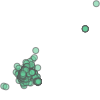

In [176]:
# Look at all origin points
MultiPoint(taxi['origin'])

In [177]:
try:
    assert all(item in taxi.columns for item in ['origin','pickup_longitude', 'pickup_latitude','dropoff_longitude','dropoff_latitude']) == True
except:
    raise AssertionError("taxi should have 5 columns of data now")
try:
    assert isinstance(taxi['origin'], pd.core.series.Series) 
except:
    raise AssertionError("You should now have a column called origin")
try:
    assert all( isinstance(item, Point) for item in taxi['origin']) == True
except:
    raise AssertionError('each entries in origin should be a shapely point')
try:
    assert round(taxi['origin'][0].x,3) == -73.973
except:
    raise AssertionError("Check your origin values - is latitude on the x-axis or the y-axis? Remember that Point takes (x,y) not (y,x)")

In [178]:
"""Additional hidden tests"""

'Additional hidden tests'

In [179]:
"""Additional hidden tests"""

'Additional hidden tests'

## Challenge Question 2: Creating LineStrings (optional - 0 Points):

Use `apply` with a normal function, a `lambda` functions **or** instead use `iterrows` loops to generate a column or a list called `OD_lines`. This list or column should contain shapely `LineString` objects that connect each origin and destination pair. 
  

In [180]:
# use this function

liner = lambda x1,y1,x2,y2: LineString([Point(x1, y1),Point(x2, y2)])


def travel_line(row): 
    return liner( x1 = row['pickup_longitude'], y1 =row['pickup_latitude'],
                 x2 =row['dropoff_longitude'], y2 = row['dropoff_latitude'])

# HINT:
# taxi['origin'] = taxi.apply(....)
# YOUR CODE HERE
taxi['origin'] = taxi.apply(lambda row: Point(row['pickup_longitude'], row['pickup_latitude']), axis=1)
taxi['destination'] = taxi.apply(lambda row: Point(row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

taxi['OD_lines'] = taxi.apply(travel_line, axis = 1)

print(taxi['OD_lines'])

0       LINESTRING (-73.9733200073242 40.7638053894043...
1       LINESTRING (-73.9868621826172 40.7193832397461...
2       LINESTRING (-73.982524 40.75126, -73.979654 40...
3       LINESTRING (-73.98116 40.767807, -73.990448 40...
4       LINESTRING (-73.966046 40.789775, -73.988565 4...
                              ...                        
9909    LINESTRING (-73.9681243896484 40.7969970703125...
9910    LINESTRING (-73.9455108642578 40.8036003112793...
9911    LINESTRING (-73.9916000366211 40.7266082763672...
9912    LINESTRING (-73.9855728149414 40.7354316711426...
9913    LINESTRING (-73.9880218505859 40.7540702819824...
Name: OD_lines, Length: 9914, dtype: object


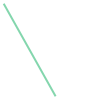

In [181]:
#print example
LineString(taxi['OD_lines'][2])

In [182]:
try:
    assert isinstance(taxi['OD_lines'][0], LineString) 
except:
    raise AssertionError("OD_lines should be a LineString object")
try:
    assert round(taxi['OD_lines'][0].length,3) == 0.022
except:
    raise AssertionError("Please check your function, is latitude x or y axis? Remember that Point takes (x,y) not (y,x)")
try:
    assert round(taxi['OD_lines'][5555].length,3)== 0.018
except:
    raise AssertionError("Please check your function, is latitude x or y axis? Remember that Point takes (x,y) not (y,x)")


See if you can calculate the average length of these lines and store it in a column called `OD_length`. Since this is measured in degrees, convert this to miles assuming 1 degree is equal to 69 miles in NY. 

In [183]:
import numpy as np
taxi.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,origin,destination,OD_lines
0,-73.973320,40.763805,-73.981430,40.743835,POINT (-73.9733200073242 40.7638053894043),POINT (-73.9814300537109 40.7438354492188),LINESTRING (-73.9733200073242 40.7638053894043...
1,-73.986862,40.719383,-73.998886,40.739201,POINT (-73.9868621826172 40.7193832397461),POINT (-73.9988861083984 40.739200592041),LINESTRING (-73.9868621826172 40.7193832397461...
2,-73.982524,40.751260,-73.979654,40.746139,POINT (-73.982524 40.75126),POINT (-73.979654 40.746139),"LINESTRING (-73.982524 40.75126, -73.979654 40..."
3,-73.981160,40.767807,-73.990448,40.751635,POINT (-73.98116 40.767807),POINT (-73.990448 40.751635),"LINESTRING (-73.98116 40.767807, -73.990448 40..."
4,-73.966046,40.789775,-73.988565,40.744427,POINT (-73.966046 40.789775),POINT (-73.988565 40.744427),"LINESTRING (-73.966046 40.789775, -73.988565 4..."


In [184]:
# YOUR CODE HERE
import geopandas as gpd
taxi = gpd.GeoDataFrame(taxi, geometry=taxi["OD_lines"], crs="EPSG:4326")
taxi['OD_length'] = taxi.length * 69
avg_length = taxi['OD_length'].mean()

/var/folders/zs/qg91ct2s3r1dh50y68w3rrf80000gn/T/ipykernel_40854/2238766687.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  taxi['OD_length'] = taxi.length * 69


In [185]:
# make sure the values are reasonable
taxi['OD_length'].describe()

count    9914.000000
mean        2.425100
std         2.929692
min         0.000000
25%         0.915005
50%         1.547201
75%         2.771750
max        72.955800
Name: OD_length, dtype: float64

In [186]:
import numpy as np
try:
    assert isinstance(taxi['OD_length'][0], np.float64) 
except:
    raise AssertionError("These lengths should be floating point numbers")
try:
    assert round(taxi['OD_length'][0],3) == 1.487
except:
    raise AssertionError("Did you calculate length and then convert to miles?")
try:
    assert round(taxi['OD_length'][5555],3)== 1.273
except:
    raise AssertionError("Did you calculate length and then convert to miles?")